- create clusters
- define features
- edf to numpy
- segment subsegments and clusters
- extract features to a vector
- combine vectors for each channel to a matrix


In [57]:
import pickle
import numpy as np
from scipy import stats
import statistics
import time
import os
import pywt

base_dir = os.path.join('..', 'data', 'numpy_data')
with open('s_segments_10s.pkl', 'rb') as file:
    s_segments_10s = pickle.load(file)
with open('ns_segments_10s.pkl', 'rb') as file:
    ns_segments_10 = pickle.load(file)

In [35]:
# load a numpy files of recordings
import os
import numpy as np

# Define the base directory using os.path.join for compatibility
base_dir = os.path.join('..', 'data', 'numpy_data')
filename = 'preprocessed_0.npy'  # Accessing file with i = 0

# Construct the full file path
full_file_path = os.path.join(base_dir, filename)

# Load the numpy file
data = np.load(full_file_path)

# 'data' now contains the numpy array from the file 'preprocessed_0.npy'

# downsample data by a factor of 5
# data = data[::5]

In [58]:


# i just installed it with pip, why does it not work?

# Function to perform discrete wavelet transform
def wavelet_decompose(signal, wavelet='db4', level=5):
    # Perform the decomposition
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    return coeffs

# Function to extract features from wavelet coefficients
def extract_features(coeffs):
    features = []
    for coeff in coeffs:
        # You can extract more features as per your analysis needs
        features.append(np.mean(coeff))
        features.append(np.std(coeff))
    return features

# Example usage
def process_aeeg_data(aeeg_data):
    # Assuming aeeg_data is a 2D numpy array where rows are channels and columns are data points
    all_features = []
    for channel_data in aeeg_data:
        coeffs = wavelet_decompose(channel_data)
        features = extract_features(coeffs)
        all_features.append(features)
    return all_features

# Example: Simulated EEG data (replace this with your actual EEG data loading mechanism)
# Simulate an EEG signal: 10 seconds long at 256 Hz
sampling_rate = 256  # Hz
duration = 10  # seconds
num_samples = duration * sampling_rate
#simulated_aeeg = np.random.rand(5, num_samples)  # 5 channels of EEG

#simulated_aeeg = s_segmented_data[0]
# Process the EEG data
#features = process_aeeg_data(simulated_aeeg)
#print(features)

def extract_wavelet_features(x):
    coeff = np.array(x)
    energy = np.sum(coeff ** 2)
    # Calculate entropy
    entropy = -np.sum((coeff ** 2) * np.log(coeff ** 2 + 1e-12))
    # Calculate standard deviation and variance
    std_dev = np.std(coeff)
    variance = np.var(coeff)
    # Calculate mean and median
    mean_val = np.mean(coeff)
    median_val = np.median(coeff)
    return [energy, entropy, std_dev, variance, mean_val, median_val]


In [59]:
ns_all_features = []
p = 0
for patient in ns_segments_10:
    filename = 'preprocessed_' + str(p) + '.npy'
    full_file_path = os.path.join(base_dir, filename)
    try:
        data = np.load(full_file_path)
    except Exception as e:
        print(f"Error loading {filename}: {e}")
        p += 1
        continue

    for subsegment in patient:
        start, end = subsegment
        if end * 256 > data.shape[1]:  # Check if the end index is within the bounds
            print(f"Index out of bounds for {filename}: start={start * 256}, end={end * 256}")
            continue

        try:
            features = process_aeeg_data(data[:, int(start * 256): int(end * 256)])
            subfeatures = []
            for i in features:
                subfeatures.append(extract_wavelet_features(i))
            ns_all_features.append(subfeatures)
        except Exception as e:
            print(f"Error processing data in {filename} from {start * 256} to {end * 256}: {e}")
    
    p += 1
    print(p)


1
2
3
4
5
Index out of bounds for preprocessed_5.npy: start=953344, end=955904
Index out of bounds for preprocessed_5.npy: start=955904, end=958464
Index out of bounds for preprocessed_5.npy: start=958464, end=961024
Index out of bounds for preprocessed_5.npy: start=961024, end=963584
Index out of bounds for preprocessed_5.npy: start=963584, end=966144
Index out of bounds for preprocessed_5.npy: start=966144, end=968704
Index out of bounds for preprocessed_5.npy: start=968704, end=971264
Index out of bounds for preprocessed_5.npy: start=971264, end=973824
Index out of bounds for preprocessed_5.npy: start=973824, end=976384
Index out of bounds for preprocessed_5.npy: start=976384, end=978944
Index out of bounds for preprocessed_5.npy: start=978944, end=981504
Index out of bounds for preprocessed_5.npy: start=981504, end=984064
Index out of bounds for preprocessed_5.npy: start=984064, end=986624
Index out of bounds for preprocessed_5.npy: start=986624, end=989184
Index out of bounds for 

In [63]:
len(ns_all_features[0][0])

6

In [64]:
s_all_features = []
p = 0
for patient in s_segments_10s:
    filename = 'preprocessed_' + str(p) + '.npy'
    full_file_path = os.path.join(base_dir, filename)
    try:
        data = np.load(full_file_path)
    except Exception as e:
        print(f"Error loading {filename}: {e}")
        p += 1
        continue

    for subsegment in patient:
        start, end = subsegment
        if end * 256 > data.shape[1]:  # Check if the end index is within the bounds
            print(f"Index out of bounds for {filename}: start={start * 256}, end={end * 256}")
            continue

        try:
            features = process_aeeg_data(data[:, int(start * 256): int(end * 256)])
            subfeatures = []
            for i in features:
                subfeatures.append(extract_wavelet_features(i))
            s_all_features.append(subfeatures)
        except Exception as e:
            print(f"Error processing data in {filename} from {start * 256} to {end * 256}: {e}")
    
    p += 1
    print(p)


1
2
3
4
5
6
7
8
9
10
11
12
Index out of bounds for preprocessed_12.npy: start=2181632, end=2184192
Index out of bounds for preprocessed_12.npy: start=2184192, end=2186752
Index out of bounds for preprocessed_12.npy: start=2186752, end=2189312
Index out of bounds for preprocessed_12.npy: start=2189312, end=2191872
Index out of bounds for preprocessed_12.npy: start=2191872, end=2194432
Index out of bounds for preprocessed_12.npy: start=2194432, end=2196992
Index out of bounds for preprocessed_12.npy: start=2196992, end=2199552
Index out of bounds for preprocessed_12.npy: start=2199552, end=2202112
Index out of bounds for preprocessed_12.npy: start=2202112, end=2204672
Index out of bounds for preprocessed_12.npy: start=2263296, end=2265856
Index out of bounds for preprocessed_12.npy: start=2265856, end=2268416
Index out of bounds for preprocessed_12.npy: start=2268416, end=2270976
Index out of bounds for preprocessed_12.npy: start=2270976, end=2273536
Index out of bounds for preprocessed_

In [65]:
counter = 0
for i in ns_segments_10:
    counter += len(i)
print(counter)

32557


In [66]:
len(ns_all_features)

25805

In [67]:
counter = 0
for i in s_segments_10s:
    counter += len(i)
print(counter)

3728


In [68]:
len(s_all_features)

2894

In [93]:
s_all_features = np.array(s_all_features)
ns_all_features = np.array(ns_all_features)

s_all_features_flat = []
for i in range(len(s_all_features)):
    s_all_features_flat.append(s_all_features[i].flatten())
ns_all_features_flat = []
for i in range(len(ns_all_features)):
    ns_all_features_flat.append(ns_all_features[i].flatten())

In [94]:
np.array(s_all_features_flat).shape

(2894, 114)

In [95]:
# transpose the numpy array s_wavelet_features_extacted_flat
s_all_features_flat_T = np.array(s_all_features_flat).T
ns_all_features_flat_T = np.array(ns_all_features_flat).T

In [96]:
print(s_all_features_flat_T.shape, ns_all_features_flat_T.shape)

(114, 2894) (114, 25805)


In [19]:
# compare the distribution of values in each corresponding subarray of s_wavelet_features_extacted_flat_T and ns_wavelet_features_extacted_flat_T, put the results into a table
import numpy as np
import pandas as pd

# Assuming s_wavelet_features_extracted_flat_T and ns_wavelet_features_extracted_flat_T are defined and have the same shape

# Initialize a list to hold the data for the DataFrame
data = []

# Define the statistics to calculate
statistics = ['mean', 'median', 'std', 'min', 'max']

# Iterate over the subarrays
for i in range(len(s_all_features_flat_T)):
    # Calculate statistics for s_wavelet_features_extracted_flat_T
    s_stats = {
        'mean': np.mean(s_all_features_flat_T[i]),
        'median': np.median(s_all_features_flat_T[i]),
        'std': np.std(s_all_features_flat_T[i]),
        'min': np.min(s_all_features_flat_T[i]),
        'max': np.max(s_all_features_flat_T[i])
    }
    
    # Calculate statistics for ns_wavelet_features_extracted_flat_T
    ns_stats = {
        'mean': np.mean(ns_all_features_flat_T[i]),
        'median': np.median(ns_all_features_flat_T[i]),
        'std': np.std(ns_all_features_flat_T[i]),
        'min': np.min(ns_all_features_flat_T[i]),
        'max': np.max(ns_all_features_flat_T[i])
    }
    
    # Append the statistics to the data list
    data.append({
        'Subarray': i,
        'S_Mean': s_stats['mean'],
        'S_Median': s_stats['median'],
        'S_Std': s_stats['std'],
        'S_Min': s_stats['min'],
        'S_Max': s_stats['max'],
        'NS_Mean': ns_stats['mean'],
        'NS_Median': ns_stats['median'],
        'NS_Std': ns_stats['std'],
        'NS_Min': ns_stats['min'],
        'NS_Max': ns_stats['max']
    })

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Set the index to the Subarray column for better readability
df.set_index('Subarray', inplace=True)



In [51]:
df.shape

(114, 25)

In [50]:
def scale_columns(df, col1, col2):
    global_min = min(df[col1].min(), df[col2].min())
    global_max = max(df[col1].max(), df[col2].max())
    df[col1 + '_Sc'] = (df[col1] - global_min) / (global_max - global_min)
    df[col2 + '_Sc'] = (df[col2] - global_min) / (global_max - global_min)

scale_columns(df, 'S_Mean', 'NS_Mean')
scale_columns(df, 'S_Median', 'NS_Median')
scale_columns(df, 'S_Std', 'NS_Std')
scale_columns(df, 'S_Min', 'NS_Min')  # Check column name, it should be 'NS_Min' if typo
scale_columns(df, 'S_Max', 'NS_Max')

df

,S_Mean,S_Median,S_Std,S_Min,S_Max,NS_Mean,NS_Median,NS_Std,NS_Min,NS_Max,...,NS_Std_Sc,S_Min_Sc,NS_Min_Sc,S_Max_Sc,NS_Max_Sc,Mean_Diff,Median_Diff,Std_Diff,Min_Diff,Max_Diff
Subarray,,,,,,,,,,,,,,,,,,,,,
0,31093.208320,6869.742520,3.540423e+05,2.788895e-04,1.452467e+07,41474.699117,6407.553579,3.969290e+05,1.387299e-03,1.461284e+07,...,3.990719e-03,1.000000,1.000000,5.972819e-02,6.009075e-02,-3.197574e-03,4.928776e-03,-4.311834e-04,-2.424727e-13,-3.625521e-04
1,-403901.786409,-57735.552104,5.540558e+06,-2.353326e+08,7.299699e-01,-534372.773602,-52189.238468,6.346294e+06,-2.365704e+08,3.581913e-01,...,6.380562e-02,0.948532,0.948262,1.590999e-09,6.217579e-11,4.018600e-02,-5.914581e-02,-8.100870e-03,2.706972e-04,1.528823e-09
2,26.062323,21.632801,3.880726e+01,4.615632e-03,1.009630e+03,29.595028,20.591049,4.548471e+01,1.029438e-02,1.010784e+03,...,4.535409e-07,1.000000,1.000000,4.150379e-06,4.155125e-06,-1.088099e-06,1.110923e-05,-6.713506e-08,-1.241784e-12,-4.745384e-09
3,2185.247800,467.978086,2.464218e+04,2.130406e-05,1.019354e+06,2944.724149,423.991318,2.791324e+04,1.059743e-04,1.021685e+06,...,2.806358e-04,1.000000,1.000000,4.191772e-03,4.201360e-03,-2.339242e-04,4.690742e-04,-3.288723e-05,-1.865175e-14,-9.587644e-06
4,11.713894,9.951843,1.639017e+01,-3.397178e-02,4.370767e+02,13.132325,10.020846,1.841312e+01,-4.462393e-02,4.427772e+02,...,1.813632e-07,1.000000,1.000000,1.795931e-06,1.819372e-06,-4.368869e-07,-7.358430e-07,-2.033871e-08,2.329692e-12,-2.344143e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-371258.337791,-66189.093490,4.910716e+06,-2.354293e+08,6.407998e-01,-660320.366561,-48586.484266,6.969628e+06,-2.338378e+08,3.581913e-01,...,7.007262e-02,0.948511,0.948859,1.224315e-09,6.217579e-11,8.903318e-02,-1.877140e-01,-2.070030e-02,-3.480640e-04,1.162139e-09
110,27.489221,23.151052,3.651069e+01,4.615632e-03,1.009805e+03,30.617251,20.206165,5.107537e+01,1.029438e-02,1.005122e+03,...,5.097494e-07,1.000000,1.000000,4.151099e-06,4.131842e-06,-9.634557e-07,3.140422e-05,-1.464332e-07,-1.241784e-12,1.925708e-08
111,2088.687725,535.971229,2.196677e+04,2.130406e-05,1.019707e+06,3546.109098,408.289150,3.089146e+04,1.059743e-04,1.010271e+06,...,3.105789e-04,1.000000,1.000000,4.193225e-03,4.154423e-03,-4.488962e-04,1.361600e-03,-8.972888e-05,-1.865175e-14,3.880163e-05


In [21]:
# add a column for the difference between the corresponding values in the scaled columns
df['Mean_Diff'] = df['S_Mean_Sc'] - df['NS_Mean_Sc']
df['Median_Diff'] = df['S_Median_Sc'] - df['NS_Median_Sc']
df['Std_Diff'] = df['S_Std_Sc'] - df['NS_Std_Sc']
df['Min_Diff'] = df['S_Min_Sc'] - df['NS_Min_Sc']
df['Max_Diff'] = df['S_Max_Sc'] - df['NS_Max_Sc']

In [ ]:
# scale each column of the table but scale the corresponding columns of s_wavelet_features_extracted_flat_T and ns_wavelet_features_extracted_flat_T by the same factor


In [48]:
len(s_all_features_flat_T)

114

In [97]:
import numpy as np
import pandas as pd

# Convert arrays to pandas DataFrames
#df_ns = pd.DataFrame(s_all_features_flat_T)
#df_s = pd.DataFrame(ns_all_features_flat_T)

df_ns = pd.DataFrame(s_all_features_flat)
df_s = pd.DataFrame(ns_all_features_flat)

# Add a label column
df_ns['label'] = 0
df_s['label'] = 1

# Concatenate both DataFrames
combined_df = pd.concat([df_ns, df_s], ignore_index=True)


In [98]:
combined_df

,0,1,2,3,4,5,6,7,8,9,...,105,106,107,108,109,110,111,112,113,label
0,2299.317349,-16105.364904,12.216727,149.248419,6.508561,0.495779,2466.236025,-17397.461774,12.593647,158.599934,...,0.020537,0.125428,0.055852,1683.832532,-11203.862064,10.458078,109.371392,5.563091,0.144947,0
1,261.741546,-1176.660716,4.037688,16.302923,2.347099,0.104959,243.022739,-1086.941974,3.895475,15.174729,...,0.018804,0.119645,0.056147,317.181784,-1524.823170,4.439784,19.711683,2.592322,0.208844,0
2,178.330116,-770.402190,3.338501,11.145591,1.927499,0.182681,161.745870,-674.308390,3.166209,10.024877,...,0.020137,0.130402,0.054253,653.091193,-3930.158044,6.671535,44.509376,3.148792,0.228518,0
3,170.000558,-742.487370,3.327072,11.069409,1.759916,0.232751,218.642217,-1002.848809,3.792557,14.383490,...,0.024654,0.136470,0.056293,307.574651,-1481.277049,4.331504,18.761928,2.620934,0.456749,0
4,180.920389,-819.680621,3.491259,12.188887,1.699356,0.029658,331.331817,-1675.248519,4.738030,22.448930,...,0.026142,0.137801,0.054343,393.421087,-2090.913658,5.062710,25.631029,2.674708,0.237751,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28694,7427.109048,-62012.114953,22.461292,504.509632,10.696547,0.538925,6669.189704,-55144.715738,21.312041,454.203107,...,1738.349643,18.137472,0.702981,12463.422111,-111740.874071,29.291096,857.968315,13.440617,0.066460,1
28695,6144.978850,-51543.774173,21.269277,452.382151,7.726540,0.154758,4407.975974,-34974.546630,17.914936,320.944922,...,1564.328706,15.532444,0.375797,6103.670501,-51162.346524,20.563463,422.856020,9.261921,0.695644,1
28696,18257.814309,-170575.689021,36.576392,1337.832465,13.551829,0.618321,10083.736057,-87476.124496,26.264265,689.811618,...,3812.429502,20.087528,0.206440,12188.651890,-109193.905140,29.179953,851.469628,12.816059,0.668586,1
28697,13453.173062,-117923.917801,29.660788,879.762370,15.534973,0.586860,10485.304855,-89022.101339,25.802083,665.747467,...,1502.661979,16.853419,0.813607,7788.085872,-66732.284257,23.188871,537.723740,10.549096,0.239102,1


In [99]:
# export combined_df to a csv file
combined_df.to_csv('combined_df.csv', index=False)

In [3]:
# import the csv file
import pandas as pd
combined_df = pd.read_csv('combined_df.csv')

In [100]:
# return a list of correletion of features to label
correlations = combined_df.corr()['label'].sort_values(ascending=False)

In [101]:
correlations

label    1.000000
58       0.028969
59       0.026397
56       0.025476
46       0.018453
           ...   
52      -0.014957
50      -0.014970
48      -0.015492
51      -0.015509
53      -0.021173
Name: label, Length: 115, dtype: float64

In [102]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming combined_df is already defined
# If combined_df was defined in an earlier session, you might need to redefine it here

# Separate features and labelsí
features = combined_df.drop('label', axis=1)
labels = combined_df['label']

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=4)  # Adjust the number of components based on your needs
principal_components = pca.fit_transform(features_scaled)

loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(4)], index=combined_df.columns[:-1])
l = loadings[['PC1', 'PC2', 'PC3', 'PC4']]

# Create a new DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_df['label'] = labels

# Display the PCA output DataFrame
print(pca_df)

# print variables in percentage
print("Explained variance by each component in percentage:", pca.explained_variance_ratio_)


            PC1       PC2       PC3       PC4  label
0     -0.940215  0.549760 -0.223973 -0.318050      0
1     -1.662112  1.265325 -0.098833  0.286461      0
2     -1.690435  1.285761 -0.143459  0.212862      0
3     -1.606164  1.209664 -0.145406  0.014845      0
4     -1.616884  1.176733 -0.151232  0.137742      0
...         ...       ...       ...       ...    ...
28694  0.022661  0.017667  0.209927  0.216527      1
28695 -0.796920  0.625324  0.020492  0.473755      1
28696  0.373137 -0.265993  0.193827  0.300592      1
28697 -0.037650  0.082376  0.220715  0.029506      1
28698 -0.325986  0.181626  0.211177  0.793998      1

[28699 rows x 5 columns]
Explained variance by each component in percentage: [0.67303115 0.07339218 0.04165395 0.032463  ]


In [103]:
combined_df['label']

0        0
1        0
2        0
3        0
4        0
        ..
28694    1
28695    1
28696    1
28697    1
28698    1
Name: label, Length: 28699, dtype: int64

In [104]:
# convert principal_components to a dataframe
principal_components_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4'])

In [105]:
principal_components_df['label'] = labels

In [106]:
principal_components_df

,PC1,PC2,PC3,PC4,label
0,-0.940215,0.549760,-0.223973,-0.318050,0
1,-1.662112,1.265325,-0.098833,0.286461,0
2,-1.690435,1.285761,-0.143459,0.212862,0
3,-1.606164,1.209664,-0.145406,0.014845,0
4,-1.616884,1.176733,-0.151232,0.137742,0
...,...,...,...,...,...
28694,0.022661,0.017667,0.209927,0.216527,1
28695,-0.796920,0.625324,0.020492,0.473755,1
28696,0.373137,-0.265993,0.193827,0.300592,1
28697,-0.037650,0.082376,0.220715,0.029506,1


In [107]:
principal_components_df['label'].value_counts()

label
1    25805
0     2894
Name: count, dtype: int64

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

'''
model_data = principal_components_df

# Splitting data into training and testing
train, test = train_test_split(model_data, test_size=0.2, stratify=model_data['label'])
'''

model_data = combined_df[0:6000]

X = model_data.drop('label', axis=1)
y = model_data['label']

# Splitting the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
'''
# Split target and features
X_train = train.drop('label', axis=1)
y_train = train['label']
X_test = test.drop('label', axis=1)
y_test = test['label']
'''
# Initialize and fit SVM model
svm_model = SVC(kernel='linear')  # Using a linear kernel, you can choose other kernels like 'rbf', 'poly', etc.
svm_model.fit(X_train, y_train)

# Predict using the trained model
y_pred = svm_model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the SVM model is: {accuracy}')



In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

model_data = combined_df

X = model_data.drop('label', axis=1)
y = model_data['label']

# Splitting the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initializing the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Training the model
dt_classifier.fit(X_train, y_train)

# Making predictions
y_pred = dt_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.8871080139372822
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.45      0.43       559
           1       0.94      0.93      0.94      5181

    accuracy                           0.89      5740
   macro avg       0.68      0.69      0.69      5740
weighted avg       0.89      0.89      0.89      5740



In [8]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Training the model
rf_classifier.fit(X_train, y_train)

# Making predictions
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.929965156794425
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.33      0.48       559
           1       0.93      0.99      0.96      5181

    accuracy                           0.93      5740
   macro avg       0.90      0.66      0.72      5740
weighted avg       0.93      0.93      0.92      5740



In [9]:
# apply adaboost
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoostClassifier
ada_classifier = AdaBoostClassifier(random_state=42)

# Training the model
ada_classifier.fit(X_train, y_train)

# Making predictions
y_pred = ada_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.9052264808362369
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.12      0.19       559
           1       0.91      0.99      0.95      5181

    accuracy                           0.91      5740
   macro avg       0.74      0.55      0.57      5740
weighted avg       0.88      0.91      0.88      5740



In [10]:
from sklearn.linear_model import LogisticRegression

# Initialize the LogisticRegression
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

# Training the model
logistic_model.fit(X_train, y_train)

# Making predictions
y_pred = logistic_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9010452961672474
Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.01      0.01       559
           1       0.90      1.00      0.95      5181

    accuracy                           0.90      5740
   macro avg       0.55      0.50      0.48      5740
weighted avg       0.83      0.90      0.86      5740



/home/danaconda/miniconda3/envs/eeg/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
from xgboost import XGBClassifier

# Initialize the XGBClassifier
xgb_classifier = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Training the model
xgb_classifier.fit(X_train, y_train)

# Making predictions
y_pred = xgb_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

/home/danaconda/miniconda3/envs/eeg/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:32:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9285714285714286
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.37      0.50       559
           1       0.94      0.99      0.96      5181

    accuracy                           0.93      5740
   macro avg       0.86      0.68      0.73      5740
weighted avg       0.92      0.93      0.92      5740



In [12]:
# naive bayes
from sklearn.naive_bayes import GaussianNB
# Initialize the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Training the model
nb_classifier.fit(X_train, y_train)

# Making predictions
y_pred = nb_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.10400696864111499
Classification Report:
              precision    recall  f1-score   support

           0       0.10      0.99      0.18       559
           1       0.93      0.01      0.02      5181

    accuracy                           0.10      5740
   macro avg       0.51      0.50      0.10      5740
weighted avg       0.85      0.10      0.03      5740



In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Initialize the Linear Discriminant Analysis (LDA) classifier
lda_classifier = LinearDiscriminantAnalysis()

# Training the model
lda_classifier.fit(X_train, y_train)

# Making predictions
y_pred = lda_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.8996515679442508
Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.01      0.03       559
           1       0.90      1.00      0.95      5181

    accuracy                           0.90      5740
   macro avg       0.57      0.50      0.49      5740
weighted avg       0.84      0.90      0.86      5740



In [6]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

# prepare datasets
model_data2 = combined_df # inbalanced
model_data1 = combined_df[0:6000] # balanced

X1 = model_data1.drop('label', axis=1)
y1 = model_data1['label']
X2 = model_data2.drop('label', axis=1)
y2 = model_data2['label']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.20, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=42)

# Define the classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    "Naive Bayes": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis(),
    "SVM": LinearSVC(random_state=42, max_iter=10000)
}

# Datasets
datasets = {
    "Dataset 1": (X_train1, y_train1, X_test1, y_test1),
    "Dataset 2": (X_train2, y_train2, X_test2, y_test2)
}

# Initialize a list to store results
results = []
'''
# Iterate over datasets
for dataset_name, (X_train, y_train, X_test, y_test) in datasets.items():
    # Iterate over classifiers
    for classifier_name, classifier in classifiers.items():
        start_time = time.time()
        # Train the classifier
        classifier.fit(X_train, y_train)
        # Make predictions
        y_pred = classifier.predict(X_test)
        # Generate classification report
        report_dict = classification_report(y_test, y_pred, output_dict=True)
        # Extract overall accuracy
        accuracy = report_dict['accuracy']
        # Extract details for each class and averages
        for label, metrics in report_dict.items():
            if label == 'accuracy':
                # Handle overall accuracy separately since it's a float, not a dictionary
                result = {
                    "Dataset": dataset_name,
                    "Classifier": classifier_name,
                    "Label": label,
                    "Accuracy": metrics  # Directly assign the float value
                }
            else:
                if label not in ['macro avg', 'weighted avg']:
                    continue  # Skip individual class metrics
                result = {
                    "Dataset": dataset_name,
                    "Classifier": classifier_name,
                    "Label": label,
                    "Precision": metrics['precision'],
                    "Recall": metrics['recall'],
                    "F1-Score": metrics['f1-score'],
                    "Support": metrics['support'],
                    "Accuracy": accuracy
                }
            results.append(result)

        print(f'Classifier: {classifier_name}, dataset: {dataset_name}, time taken: {time.time() - start_time}')
    

# Convert the results list to a pandas DataFrame
results_df = pd.DataFrame(results)

# Pivot the DataFrame for better visualization if needed
pivot_df = results_df.pivot_table(index=["Dataset", "Label"], columns=["Classifier"], values=["Precision", "Recall", "F1-Score", "Support", "Accuracy"])

# Display the pivoted DataFrame
pivot_df
'''

# Initialize dictionaries to store results for each dataset
results = {
    "Dataset 1": {},
    "Dataset 2": {}
}

# Iterate over datasets
for dataset_name, (X_train, y_train, X_test, y_test) in datasets.items():
    # Initialize sub-dictionary for each classifier within the dataset
    results[dataset_name] = {classifier_name: {} for classifier_name in classifiers.keys()}
    
    # Iterate over classifiers
    for classifier_name, classifier in classifiers.items():
        start_time = time.time()
        
        # Train the classifier
        classifier.fit(X_train, y_train)
        
        # Make predictions
        y_pred = classifier.predict(X_test)
        
        # Generate classification report with output_dict to get a dictionary
        report_dict = classification_report(y_test, y_pred, output_dict=True)
        
        # Store metrics for all relevant labels
        for label in ['0', '1', 'accuracy', 'macro avg', 'weighted avg']:
            if label in report_dict:
                if label == 'accuracy':
                    # Directly store the accuracy
                    results[dataset_name][classifier_name][label] = report_dict[label]
                else:
                    # Store other metrics
                    results[dataset_name][classifier_name][label] = {
                        'Precision': report_dict[label]['precision'],
                        'Recall': report_dict[label]['recall'],
                        'F1-Score': report_dict[label]['f1-score']
                    }
        print(f'Classifier: {classifier_name}, dataset: {dataset_name}, time taken: {time.time() - start_time}')

# Create DataFrames for each dataset
dataframes = {}
for dataset_name in results:
    # Flatten the dictionary to a DataFrame
    df_data = []
    for classifier_name, metrics_dict in results[dataset_name].items():
        for label, scores in metrics_dict.items():
            if isinstance(scores, dict):  # For precision, recall, f1-score
                for score_name, value in scores.items():
                    df_data.append((label, score_name, classifier_name, value))
            else:  # For accuracy
                df_data.append((label, 'Accuracy', classifier_name, scores))
    
    # Create a DataFrame from the list
    df = pd.DataFrame(df_data, columns=['Label', 'Metric', 'Classifier', 'Value'])
    # Pivot the DataFrame
    pivoted_df = df.pivot_table(index=['Label', 'Metric'], columns='Classifier', values='Value')
    
    # Store the DataFrame in a dictionary
    dataframes[dataset_name] = pivoted_df

# Display the DataFrame for Dataset 1 and Dataset 2
dataframes["Dataset 1"], dataframes["Dataset 2"]

Classifier: Decision Tree, dataset: Dataset 1, time taken: 0.6046285629272461
Classifier: Random Forest, dataset: Dataset 1, time taken: 3.2904436588287354
Classifier: AdaBoost, dataset: Dataset 1, time taken: 3.111027956008911


/home/danaconda/miniconda3/envs/eeg/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/danaconda/miniconda3/envs/eeg/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:04:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classifier: Logistic Regression, dataset: Dataset 1, time taken: 0.9071516990661621
Classifier: XGBoost, dataset: Dataset 1, time taken: 0.9726059436798096
Classifier: Naive Bayes, dataset: Dataset 1, time taken: 0.012832403182983398
Classifier: LDA, dataset: Dataset 1, time taken: 0.04872894287109375


/home/danaconda/miniconda3/envs/eeg/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/danaconda/miniconda3/envs/eeg/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Classifier: SVM, dataset: Dataset 1, time taken: 11.003265619277954
Classifier: Decision Tree, dataset: Dataset 2, time taken: 5.704214811325073
Classifier: Random Forest, dataset: Dataset 2, time taken: 27.11743998527527
Classifier: AdaBoost, dataset: Dataset 2, time taken: 16.765075206756592


/home/danaconda/miniconda3/envs/eeg/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/danaconda/miniconda3/envs/eeg/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:05:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classifier: Logistic Regression, dataset: Dataset 2, time taken: 5.82411789894104
Classifier: XGBoost, dataset: Dataset 2, time taken: 1.6475365161895752
Classifier: Naive Bayes, dataset: Dataset 2, time taken: 0.041023969650268555
Classifier: LDA, dataset: Dataset 2, time taken: 0.5201058387756348


/home/danaconda/miniconda3/envs/eeg/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Classifier: SVM, dataset: Dataset 2, time taken: 118.4997820854187


/home/danaconda/miniconda3/envs/eeg/lib/python3.12/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(Classifier              AdaBoost  Decision Tree       LDA  \
 Label        Metric                                         
 0            F1-Score   0.797203       0.843170  0.717254   
              Precision  0.838235       0.853242  0.783037   
              Recall     0.760000       0.833333  0.661667   
 1            F1-Score   0.815287       0.846787  0.757927   
              Precision  0.780488       0.837134  0.707071   
              Recall     0.853333       0.856667  0.816667   
 accuracy     Accuracy   0.806667       0.845000  0.739167   
 macro avg    F1-Score   0.806245       0.844979  0.737591   
              Precision  0.809362       0.845188  0.745054   
              Recall     0.806667       0.845000  0.739167   
 weighted avg F1-Score   0.806245       0.844979  0.737591   
              Precision  0.809362       0.845188  0.745054   
              Recall     0.806667       0.845000  0.739167   
 
 Classifier              Logistic Regression  Naive Bayes  Random Fo

In [17]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Assuming dataset1 and dataset2 are already loaded and split
# For example:
# X_train1, X_test1, y_train1, y_test1
# X_train2, X_test2, y_train2, y_test2

# Initialize classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
}

# Create Voting Classifier
voting_clf = VotingClassifier(
    estimators=[(name, clf) for name, clf in classifiers.items()],
    voting='soft'  # or 'hard' if preferred
)


# Train the ensemble model
voting_clf.fit(X_train1, y_train1)

# Predict and evaluate the model
y_pred1 = voting_clf.predict(X_test2)
print("Accuracy on Combined Data:", accuracy_score(y_test2, y_pred1))

# If you want to check performance on each dataset separately as well
y_pred1 = voting_clf.predict(X_test1)
y_pred2 = voting_clf.predict(X_test2)
print("Accuracy on Dataset 1:", accuracy_score(y_test1, y_pred1))
print("Accuracy on Dataset 2:", accuracy_score(y_test2, y_pred2))

# print both classification reports
report1 = classification_report(y_test1, y_pred1)
report2 = classification_report(y_test2, y_pred2)
# training on balanced testing on inbalanced
#Accuracy on Combined Data: 0.895
#Accuracy on Dataset 1: 0.895
#Accuracy on Dataset 2: 0.4172473867595819


/home/danaconda/miniconda3/envs/eeg/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:40:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy on Combined Data: 0.4172473867595819
Accuracy on Dataset 1: 0.895
Accuracy on Dataset 2: 0.4172473867595819


In [16]:
print(report1)
print(report2)

              precision    recall  f1-score   support

           0       1.00      0.84      0.91       600
           1       0.87      1.00      0.93       600

    accuracy                           0.92      1200
   macro avg       0.93      0.92      0.92      1200
weighted avg       0.93      0.92      0.92      1200

              precision    recall  f1-score   support

           0       0.76      0.40      0.53       559
           1       0.94      0.99      0.96      5181

    accuracy                           0.93      5740
   macro avg       0.85      0.70      0.75      5740
weighted avg       0.92      0.93      0.92      5740



In [18]:
print(report1)
print(report2)

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       600
           1       0.87      0.92      0.90       600

    accuracy                           0.90      1200
   macro avg       0.90      0.90      0.89      1200
weighted avg       0.90      0.90      0.89      1200

              precision    recall  f1-score   support

           0       0.14      0.97      0.24       559
           1       0.99      0.36      0.53      5181

    accuracy                           0.42      5740
   macro avg       0.56      0.66      0.38      5740
weighted avg       0.91      0.42      0.50      5740



In [7]:
dataframes["Dataset 1"]

Classifier              AdaBoost  Decision Tree       LDA  \
Label        Metric                                         
0            F1-Score   0.797203       0.843170  0.717254   
             Precision  0.838235       0.853242  0.783037   
             Recall     0.760000       0.833333  0.661667   
1            F1-Score   0.815287       0.846787  0.757927   
             Precision  0.780488       0.837134  0.707071   
             Recall     0.853333       0.856667  0.816667   
accuracy     Accuracy   0.806667       0.845000  0.739167   
macro avg    F1-Score   0.806245       0.844979  0.737591   
             Precision  0.809362       0.845188  0.745054   
             Recall     0.806667       0.845000  0.739167   
weighted avg F1-Score   0.806245       0.844979  0.737591   
             Precision  0.809362       0.845188  0.745054   
             Recall     0.806667       0.845000  0.739167   

Classifier              Logistic Regression  Naive Bayes  Random Forest  \
Label        Metric                                                       
0            F1-Score              0.551849     0.013245       0.898799   
             Precision             0.601179     1.000000       0.925795   
             Recall                0.510000     0.006667       0.873333   
1            F1-Score              0.615027     0.668151       0.904376   
             Precision             0.574530     0.501672       0.880126   
             Recall                0.661667     1.000000       0.930000   
accuracy     Accuracy              0.585833     0.503333       0.901667   
macro avg    F1-Score              0.583438     0.340698       0.901588   
             Precision             0.587854     0.750836       0.902961   
             Recall                0.585833     0.503333       0.901667   
weighted avg F1-Score              0.583438     0.340698       0.901588   
             Precision             0.587854     0.750836       0.902961   
             Recall                0.585833     0.503333       0.901667   

Classifier                   SVM   XGBoost  
Label        Metric                         
0            F1-Score   0.602133  0.891546  
             Precision  0.592892  0.914186  
             Recall     0.611667  0.870000  
1            F1-Score   0.589331  0.896664  
             Precision  0.598967  0.875994  
             Recall     0.580000  0.918333  
accuracy     Accuracy   0.595833  0.894167  
macro avg    F1-Score   0.595732  0.894105  
             Precision  0.595930  0.895090  
             Recall     0.595833  0.894167  
weighted avg F1-Score   0.595732  0.894105  
             Precision  0.595930  0.895090  
             Recall     0.595833  0.894167

In [8]:
dataframes["Dataset 2"]

Classifier              AdaBoost  Decision Tree       LDA  \
Label        Metric                                         
0            F1-Score   0.192878       0.434555  0.027027   
             Precision  0.565217       0.424191  0.242424   
             Recall     0.116279       0.445438  0.014311   
1            F1-Score   0.949658       0.937294  0.947098   
             Precision  0.912178       0.939841  0.903452   
             Recall     0.990349       0.934762  0.995175   
accuracy     Accuracy   0.905226       0.887108  0.899652   
macro avg    F1-Score   0.571268       0.685925  0.487062   
             Precision  0.738698       0.682016  0.572938   
             Recall     0.553314       0.690100  0.504743   
weighted avg F1-Score   0.875957       0.888334  0.857495   
             Precision  0.878388       0.889623  0.839077   
             Recall     0.905226       0.887108  0.899652   

Classifier              Logistic Regression  Naive Bayes  Random Forest  \
Label        Metric                                                       
0            F1-Score              0.010453     0.177778       0.480620   
             Precision             0.200000     0.097612       0.865116   
             Recall                0.005367     0.994633       0.332737   
1            F1-Score              0.947919     0.015694       0.962451   
             Precision             0.902882     0.931818       0.932489   
             Recall                0.997684     0.007914       0.994403   
accuracy     Accuracy              0.901045     0.104007       0.929965   
macro avg    F1-Score              0.479186     0.096736       0.721536   
             Precision             0.551441     0.514715       0.898802   
             Recall                0.501525     0.501273       0.663570   
weighted avg F1-Score              0.856622     0.031479       0.915527   
             Precision             0.834431     0.850578       0.925928   
             Recall                0.901045     0.104007       0.929965   

Classifier                   SVM   XGBoost  
Label        Metric                         
0            F1-Score   0.170889  0.502427  
             Precision  0.100603  0.781132  
             Recall     0.567084  0.370304  
1            F1-Score   0.604118  0.961524  
             Precision  0.906528  0.935708  
             Recall     0.453001  0.988805  
accuracy     Accuracy   0.464111  0.928571  
macro avg    F1-Score   0.387504  0.731976  
             Precision  0.503565  0.858420  
             Recall     0.510043  0.679555  
weighted avg F1-Score   0.561928  0.916814  
             Precision  0.828041  0.920654  
             Recall     0.464111  0.928571

## previous attemtps

In [6]:
import numpy as np
from scipy.signal import find_peaks

def extract_peak_to_peak_features(example_data):
    # Simulating a sample EEG signal data (replace this with your actual data)
    np.random.seed(0)
    example_data = np.random.normal(0, 1, 2560)  # Random normal data simulating EEG readings

    # Find peaks and troughs
    peaks, _ = find_peaks(example_data)
    troughs, _ = find_peaks(-example_data)

    # Ensure both arrays start with the smallest type (peak or trough) and end with the largest type
    if peaks[0] < troughs[0]:
        if peaks[-1] < troughs[-1]:
            peaks = peaks[:-1]
        if troughs[0] < peaks[0]:
            troughs = troughs[1:]
    else:
        if troughs[-1] < peaks[-1]:
            troughs = troughs[:-1]
        if peaks[0] < troughs[0]:
            peaks = peaks[1:]

    # Calculate peak-to-trough and trough-to-peak distances
    peak_to_trough_distances = example_data[peaks] - example_data[troughs[:len(peaks)]]
    trough_to_peak_distances = example_data[troughs[1:len(peaks)+1]] - example_data[peaks]

    # Combine distances
    all_distances = np.abs(np.concatenate((peak_to_trough_distances, trough_to_peak_distances)))

    # Calculate statistics
    # calculate number of peaks
    num_peaks = len(peaks)
    num_troughs = len(troughs)
    avg_distance = np.mean(all_distances)
    min_distance = np.min(all_distances)
    max_distance = np.max(all_distances)
    std_distance = np.std(all_distances)
    var_distance = np.var(all_distances)

    '''
    print("Average Peak-to-Peak Distance:", avg_distance)
    print("Minimum Peak-to-Peak Distance:", min_distance)
    print("Maximum Peak-to-Peak Distance:", max_distance)
    print("Standard Deviation of Peak-to-Peak Distances:", std_distance)
    print("Variance of Peak-to-Peak Distances:", var_distance)
    print("Number of Peaks:", num_peaks)
    print("Number of Troughs:", num_troughs)
    '''

    return [avg_distance, min_distance, max_distance, std_distance, var_distance, num_peaks, num_troughs]


import time

start_time = time.time()

peak_features = []
k = 0
for i in s_segmented_data:
    peak_features_segm = []
    for j in i:
        peak_features_segm.append(extract_peak_to_peak_features(j))
    peak_features.append(peak_features_segm)
    k += 1
    if k % 100 == 0:
        print(f"{k} processed, ETA: {((time.time() - start_time) / k) * (len(s_segmented_data) - k)}")



100 processed, ETA: 16.334123916625977
200 processed, ETA: 19.048666820526122
300 processed, ETA: 17.234223664601643
400 processed, ETA: 16.54944076538086
500 processed, ETA: 15.15358577156067
600 processed, ETA: 14.151929915746054
700 processed, ETA: 13.000571595600674
800 processed, ETA: 12.095650148391723
900 processed, ETA: 11.179535490671794
1000 processed, ETA: 10.495610803604126
1100 processed, ETA: 9.83689742608504
1200 processed, ETA: 9.264401760101318
1300 processed, ETA: 8.69571559025691
1400 processed, ETA: 8.170937915529525
1500 processed, ETA: 7.714655608495077
1600 processed, ETA: 7.301200902462005
1700 processed, ETA: 6.892712434319889
1800 processed, ETA: 6.476746036741469
1900 processed, ETA: 6.098259732095819
2000 processed, ETA: 5.717601425170899
2100 processed, ETA: 5.3332189868745346
2200 processed, ETA: 4.96640493999828
2300 processed, ETA: 4.6275001890763
2400 processed, ETA: 4.275578697522481
2500 processed, ETA: 3.9351308109283445
2600 processed, ETA: 3.592326

In [21]:
def extract_stats(x):
    x = x[:32]
    mean = statistics.mean(x)
    median = statistics.median(x)
    mode = statistics.mode(x)
    variance = statistics.variance(x)
    #skewness = stats.skew(x)
    #kurtosis = stats.kurtosis(x)
    return [mean, median, mode, variance] # , skewness, kurtosis]

segment_stats = []
k = 0
for i in s_segmented_data:
    stats_features_segm = []
    for j in i:
        stats_features_segm.append(extract_stats(j))
    segment_stats.append(stats_features_segm)
    k += 1
    if k % 100 == 0:
        print(f"{k} processed, ETA: {((time.time() - start_time) / k) * (len(s_segmented_data) - k)}")

100 processed, ETA: 40620.60612751007
200 processed, ETA: 19756.355612726213
300 processed, ETA: 12800.653481521607
400 processed, ETA: 9322.8883543396
500 processed, ETA: 7236.66456608963
600 processed, ETA: 5845.540908524195


StatisticsError: mean requires at least one data point

In [11]:
peak_features[3]

[[1.6488409990051691,
  0.0016818099674609788,
  4.951345526758377,
  0.9526324238845353,
  0.9075085350361248,
  855,
  856],
 [1.6488409990051691,
  0.0016818099674609788,
  4.951345526758377,
  0.9526324238845353,
  0.9075085350361248,
  855,
  856],
 [1.6488409990051691,
  0.0016818099674609788,
  4.951345526758377,
  0.9526324238845353,
  0.9075085350361248,
  855,
  856],
 [1.6488409990051691,
  0.0016818099674609788,
  4.951345526758377,
  0.9526324238845353,
  0.9075085350361248,
  855,
  856],
 [1.6488409990051691,
  0.0016818099674609788,
  4.951345526758377,
  0.9526324238845353,
  0.9075085350361248,
  855,
  856],
 [1.6488409990051691,
  0.0016818099674609788,
  4.951345526758377,
  0.9526324238845353,
  0.9075085350361248,
  855,
  856],
 [1.6488409990051691,
  0.0016818099674609788,
  4.951345526758377,
  0.9526324238845353,
  0.9075085350361248,
  855,
  856],
 [1.6488409990051691,
  0.0016818099674609788,
  4.951345526758377,
  0.9526324238845353,
  0.9075085350361248,

In [2]:
with open('clusters_seizure.pkl', 'rb') as file:
    clusters_seizure = pickle.load(file)
with open('clusters_nonseizure.pkl', 'rb') as file:
    clusters_nonseizure = pickle.load(file)

In [4]:
HDF5_FILE_PATH = 's_segmented_eeg_data.h5'
seizure_segmented_data = segment_seizure_data(s_segments_10s)

Seizures for patient 1 done
Seizures for patient 2 done
Seizures for patient 3 done
Seizures for patient 4 done
Seizures for patient 5 done
Seizures for patient 6 done
Seizures for patient 7 done
Seizures for patient 8 done
Seizures for patient 9 done
Seizures for patient 10 done
Seizures for patient 11 done
Seizures for patient 12 done
Seizures for patient 13 done
Seizures for patient 14 done
Seizures for patient 15 done
Seizures for patient 16 done
Seizures for patient 17 done
Seizures for patient 18 done
Seizures for patient 19 done
Seizures for patient 20 done
Seizures for patient 21 done
Seizures for patient 22 done
Seizures for patient 23 done
Seizures for patient 24 done
Seizures for patient 25 done
Seizures for patient 26 done
Seizures for patient 27 done
Seizures for patient 28 done
Seizures for patient 30 done
Seizures for patient 31 done
Seizures for patient 32 done
Seizures for patient 33 done
Seizures for patient 34 done
Seizures for patient 35 done
Seizures for patient 36

In [5]:
HDF5_FILE_PATH = 'ns_segmented_eeg_data.h5'
nonseizure_segmented_data = segment_nonseizure_data(ns_segments_10)

Non-seizures for patient 1 done
Non-seizures for patient 2 done
Non-seizures for patient 3 done
Non-seizures for patient 4 done
Non-seizures for patient 5 done
Non-seizures for patient 6 done
Non-seizures for patient 7 done
Non-seizures for patient 8 done
Non-seizures for patient 9 done
Non-seizures for patient 10 done
Non-seizures for patient 11 done
Non-seizures for patient 12 done
Non-seizures for patient 13 done
Non-seizures for patient 14 done
Non-seizures for patient 15 done
Non-seizures for patient 16 done
Non-seizures for patient 17 done
Non-seizures for patient 18 done
Non-seizures for patient 19 done
Non-seizures for patient 20 done
Non-seizures for patient 21 done
Non-seizures for patient 22 done
Non-seizures for patient 23 done
Non-seizures for patient 24 done
Non-seizures for patient 25 done
Non-seizures for patient 26 done
Non-seizures for patient 27 done
Non-seizures for patient 28 done
Non-seizures for patient 30 done
Non-seizures for patient 31 done
Non-seizures for pa

In [100]:
# clusters_seizure

# nest levels in list
# level 1 - data corresponding to patients indexwise
# level 2 - data corresponding to seizures indexwise
# level 3 - data corresponding to clusters indexwise
# level 4 - start and end time of the cluster

In [101]:
# clusters_nonseizure

In [102]:
'''
segmented_data = []

for patient in clusters_seizure:
    for seizure in patient:
        for cluster in seizure:
            start, end = cluster
            # Segment the data for this cluster
            cluster_segmented = data[:, int(start * int ( 256 / 5) ) : int(end * int( 256 / 5) ) - 1]
            segmented_data.append(cluster_segmented)

len(segmented_data)
'''

'\nsegmented_data = []\n\nfor patient in clusters_seizure:\n    for seizure in patient:\n        for cluster in seizure:\n            start, end = cluster\n            # Segment the data for this cluster\n            cluster_segmented = data[:, int(start * int ( 256 / 5) ) : int(end * int( 256 / 5) ) - 1]\n            segmented_data.append(cluster_segmented)\n\nlen(segmented_data)\n'

In [57]:
#segmented_data[0]

array([[ 2.01656583,  1.63447188,  1.4816343 ,  1.4816343 ,  1.55805309,
         1.63447188,  1.63447188,  1.40521551,  1.17595914],
       [ 1.17595914,  0.94670276,  0.6410276 ,  0.41177123,  0.18251486,
         0.02967728, -0.04674151, -0.04674151, -0.04674151],
       [ 1.17595914,  1.02312156,  0.79386518,  0.71744639,  0.79386518,
         0.87028397,  1.09954035,  1.17595914,  1.17595914],
       [ 5.83750534,  5.60824897,  5.30257381,  4.99689865,  4.76764228,
         4.6148047 ,  4.46196712,  4.38554833,  4.23271075]])

## Define features 

{XMe, XMax, XMin, XMean, XMod, XRand, XQ1, XQ2, XSD, XVar, XSke, XKue}

In [8]:
s_segmented_data [0][0]

IndexError: list index out of range

In [118]:
import numpy as np
from scipy import stats

def compute_features(X):
    if X.size == 0:
        return [np.nan] * 7  # Return a list of NaNs or a specific placeholder value

    X_sorted = np.sort(X)
    XMin = X_sorted[0]
    XMax = X_sorted[-1]
    XMe = X_sorted[4] if len(X_sorted) > 4 else np.nan
    XQ1 = X_sorted[2] if len(X_sorted) > 2 else np.nan
    XQ2 = X_sorted[7] if len(X_sorted) > 7 else np.nan
    XSD = np.std(X, ddof=1)  # Using Bessel's correction (ddof=1)
    XVar = np.var(X, ddof=1)  # Using Bessel's correction (ddof=1)
    XSke = stats.skew(X)
    XKue = stats.kurtosis(X, fisher=True)
    return [XMe, XMax, XMin, XQ1, XQ2, XSD, XVar, XSke, XKue]

# Example usage with your loop, ensuring it's properly set up for your data structure.
feature_data = []
start = time.time()

for seizure10s in s_segmented_data:
    channel_features = []
    for channel in seizure10s:
        features = compute_features(np.array(channel))
        channel_features.append(features)
    feature_data.append(channel_features)

/tmp/ipykernel_770720/246577112.py:16: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  XSke = stats.skew(X)
/tmp/ipykernel_770720/246577112.py:17: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  XKue = stats.kurtosis(X, fisher=True)


In [119]:
feature_data[0][0]

[-29.62081333353666,
 33.883201361125685,
 -32.142633411664036,
 -31.225607928708627,
 -26.946155674916696,
 8.82474045037219,
 77.87604401643516,
 0.1774574293139726,
 0.6083990000602357]

In [9]:
# load files
# function to load all numpy files in the directory in order 
def load_data_i(i):
    base_dir = os.path.join('..', 'data', 'numpy_data')
    filename = f'preprocessed_{i}.npy'  # Accessing file with i = 0
    full_file_path = os.path.join(base_dir, filename)
    data = np.load(full_file_path)
    return data

In [10]:
len(s_segments_10s)
len(ns_segments_10)

79

In [20]:
import os
s_segmented_data = []
i = 0
for patient in s_segments_10s:
    if i == 28:
        s_segmented_data.append([])
    else:
        data = load_data_i(i)
        for subsegment in patient:
            start, end = subsegment
            # Segment the data for this cluster
            subsegment_segmented = data[:, int(start * 256 ) : int(end * 256  ) ]
            s_segmented_data.append(subsegment_segmented)
    i += 1
    print(f'seizures for patient {i} done')

i = 0
ns_segmented_data = []
for patient in ns_segments_10:
    if i == 28:
        ns_segmented_data.append([])
    else:
        data = load_data_i(0)
        for subsegment in patient:
            start, end = subsegment
            # Segment the data for this cluster
            subsegment_segmented = data[:, int(start * 256 ) : int(end * 256  ) ]
            ns_segmented_data.append(subsegment_segmented)
    i += 1
    print(f'non-seizures for patient {i} done')

print(len(s_segmented_data), len(ns_segmented_data))

seizures for patient 1 done
seizures for patient 2 done
seizures for patient 3 done
seizures for patient 4 done
seizures for patient 5 done
seizures for patient 6 done
seizures for patient 7 done
seizures for patient 8 done
seizures for patient 9 done
seizures for patient 10 done
seizures for patient 11 done
seizures for patient 12 done
seizures for patient 13 done
seizures for patient 14 done
seizures for patient 15 done
seizures for patient 16 done
seizures for patient 17 done
seizures for patient 18 done
seizures for patient 19 done
seizures for patient 20 done
seizures for patient 21 done
seizures for patient 22 done
seizures for patient 23 done
seizures for patient 24 done
seizures for patient 25 done
seizures for patient 26 done
seizures for patient 27 done
seizures for patient 28 done
seizures for patient 29 done
seizures for patient 30 done
seizures for patient 31 done
seizures for patient 32 done
seizures for patient 33 done
seizures for patient 34 done
seizures for patient 35

: 

In [16]:
import numpy as np
import h5py

def process_segments(segments, file_path, tag):
    data_store = h5py.File(file_path, 'a')
    dataset = data_store.create_group(tag)
    i = 0
    for patient in segments:
        data = load_data_i(i)
        patient_data = []
        for start, end in patient:
            subsegment = data[:, int(start * 256):int(end * 256)]
            patient_data.append(subsegment)
        dataset.create_dataset(f'patient_{i}', data=np.array(patient_data))
        print(f'{tag} for patient {i+1} done')
        i += 1
    data_store.close()

# Example usage:
process_segments(s_segments_10s, 'segmented_data.h5', 'seizures')
process_segments(ns_segments_10, 'segmented_data.h5', 'non-seizures')


ValueError: Unable to create group (name already exists)

In [ ]:
# extract features from i-th file
def extract_features_i(i):
    data = load_data_i(i)
    feature_data = []
    for seizure10s in s_segmented_data:
        channel_features = []
        for channel in seizure10s:
            features = compute_features(np.array(channel))
            channel_features.append(features)
        feature_data.append(channel_features)
    return feature_data

## other attempt

In [112]:
def compute_features(X):
    X_sorted = np.sort(X)
    XMin = X_sorted[0]
    XMax = X_sorted[-1]
    XMe = X_sorted[4]
    XQ1 = X_sorted[2]
    XQ2 = X_sorted[7]
    XSD = np.std(X, ddof=1)  # Using Bessel's correction (ddof=1)
    XVar = np.var(X, ddof=1)  # Using Bessel's correction (ddof=1)
    XSke = stats.skew(X)
    XKue = stats.kurtosis(X, fisher=True) 
    return [XMe, XMax, XMin, XQ1, XQ2, XSD, XVar] #, XSke  XKue]

feature_data = []
start = time.time()

for seizure10s in s_segmented_data:
    channel_features = []
    for channel in seizure10s:
        features = compute_features(np.array(channel))
        channel_features.append(features)
    feature_data.append(channel_features)

'''
try:
    for seizure10s_index, seizure10s in enumerate(s_segmented_data):
        channel_features = []
        for channel in seizure10s:
            features = compute_features(np.array(channel))
            channel_features.append(features)
        feature_data.append(channel_features)

        if (seizure10s_index + 1) % 1000 == 0:
            current = time.time()
            elapsed = current - start
            estimated_total = elapsed / (seizure10s_index + 1) * len(s_segmented_data)
            estimated_remaining = estimated_total - elapsed
            print(f"Processed {seizure10s_index + 1} clusters.")
            print(f"Elapsed: {elapsed:.2f}s, Estimated Remaining: {estimated_remaining:.2f}s")
except Exception as e:
    print(f"An error occurred: {str(e)}")
'''


/tmp/ipykernel_770720/768375375.py:10: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  XSke = stats.skew(X)
/tmp/ipykernel_770720/768375375.py:11: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  XKue = stats.kurtosis(X, fisher=True)


IndexError: index 0 is out of bounds for axis 0 with size 0

In [78]:
feature_data_np = np.array(feature_data)
feature_data_np[0:50, 0, 3] # 2nd index 0-3, 3rd index 0-49

array([ 1.4816343 ,  0.79386518,  0.71744639,  0.71744639,  1.25237793,
       -0.27599788, -1.49869852,  0.10609607, -0.35241667, -0.04674151,
       -0.19957909, -2.18646764, -2.56856159, -1.11660457, -0.96376699,
       -4.0205186 , -4.32619376, -3.40916828, -3.17991191, -1.26944215,
       -1.49869852, -1.26944215, -0.42883546,  0.02967728,  1.17595914,
        2.09298462,  1.71089067,  0.94670276,  1.09954035,  0.33535244,
       -1.6515361 , -3.02707433, -0.81092941,  1.78730946,  2.62791615,
        4.38554833,  3.92703558,  5.07331744,  2.78075373,  0.18251486,
        0.56460881, -1.04018578, -3.79126223, -2.95065554, -7.76503932,
       -5.31963804, -3.56200586, -5.24321924, -3.94409981, -2.72139917])

In [86]:
feature_data_np.shape

(186400, 4, 9)

In [91]:
feature_data_np[0:50, 0, :].T[0]

array([ 1.55805309,  0.87028397,  0.79386518,  1.09954035,  1.86372825,
       -0.19957909, -1.11660457,  0.18251486,  0.10609607,  0.87028397,
       -0.04674151, -1.72795489, -2.41572401, -0.8873482 , -0.35241667,
       -2.95065554, -4.24977497, -3.17991191, -2.56856159, -0.04674151,
       -0.96376699, -0.96376699, -0.27599788,  0.56460881,  1.40521551,
        2.32224099,  2.09298462,  1.4816343 ,  1.71089067,  0.41177123,
       -0.96376699, -2.11004884, -0.19957909,  1.86372825,  2.93359131,
        4.46196712,  4.15629196,  5.68466776,  3.85061679,  0.56460881,
        1.78730946, -0.50525425, -3.2563307 , -1.80437368, -7.38294537,
       -5.01396287, -3.40916828, -3.86768102, -3.71484344, -1.88079247])

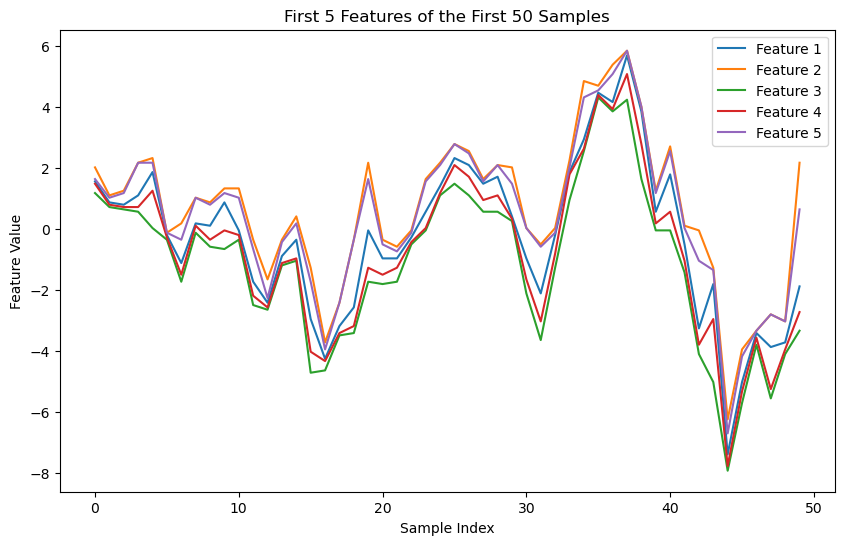

In [92]:
# plot feature_data_np[0:50, 0, :].T[0], feature_data_np[0:50, 0, :].T[1], feature_data_np[0:50, 0, :].T[2], feature_data_np[0:50, 0, :].T[3], feature_data_np[0:50, 0, :].T[4] in one graph
import matplotlib.pyplot as plt

# Assuming feature_data_np is already defined and loaded with data

# Transpose the slice to make plotting easier
data_to_plot = feature_data_np[0:50, 0, :].T

# Plot each of the first five features
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
for i in range(5):
    plt.plot(data_to_plot[i], label=f'Feature {i+1}')

plt.title('First 5 Features of the First 50 Samples')
plt.xlabel('Sample Index')
plt.ylabel('Feature Value')
plt.legend()
plt.show()

In [62]:
# for each seizure segment consisting of the 50 subsequent clustets calculate the these statistical attributes for each channels each feature


def compute_features_segment(X):
    X_sorted = np.sort(X)
    XMin = X_sorted[0]
    XMax = X_sorted[-1]
    XMe = X_sorted[24]
    XQ1 = X_sorted[12]
    XQ2 = X_sorted[37]
    XSD = np.std(X, ddof=1)  # Using Bessel's correction (ddof=1)
    XVar = np.var(X, ddof=1)  # Using Bessel's correction (ddof=1)
    XSke = stats.skew(X)
    XKue = stats.kurtosis(X, fisher=True) 
    return (XMe, XMax, XMin, XQ1, XQ2, XSD, XVar, XSke, XKue)

In [ ]:
feature_data_np[0:50, 0, :].T[0]

In [64]:
segment_features = []
for i in range(len(feature_data_np) / 50)
channel in feature_data_np.T:
    segment_features.append( compute_features_segment(channel) )


IndexError: index 24 is out of bounds for axis 0 with size 4

In [28]:
def compute_features(x):
    # Compute features
    XMe = np.median(X)
    XMax = np.max(X)
    XMin = np.min(X)
    XMean = np.mean(X)

    mode_result = stats.mode(X)
    XMod = statistics.mode(X)
    XRand = np.random.choice(X)
    XQ1 = np.percentile(X, 25)
    XQ2 = np.percentile(X, 50)  # Same as median
    XSD = np.std(X, ddof=1)  # Using Bessel's correction (ddof=1)
    XVar = np.var(X, ddof=1)  # Using Bessel's correction (ddof=1)
    XSke = stats.skew(X)
    XKue = stats.kurtosis(X, fisher=True)  # Fisher's definition, subtracts 3
    return XMe, XMax, XMin, XMean, XMod, XRand, XQ1, XQ2, XSD, XVar, XSke, XKue

In [34]:
len(segmented_data[0].T)

50

In [40]:
feature_data = []
start = time.time()
for i in range(len(segmented_data)):    
    segmented_data_transpose = segmented_data[i].T
    cluster_features = []
    for j in range(50):
        cluster_features.append( compute_features(segmented_data_transpose[j]) )
    feature_data.append(cluster_features)
    if i % 100 == 0 and i != 0:
        print(i)
        current = time.time()
        # printe ETA
        print((current - start) * (len(segmented_data) - i) / i)

100
13358.245815753937
200
12321.253289699554
300
12025.105015436808
400
11878.321598768234


KeyboardInterrupt: 

In [42]:
import numpy as np
import statistics
from scipy import stats
from multiprocessing import Pool, cpu_count
import time

def compute_features(X):
    # Compute features
    XMe = np.median(X)
    XMax = np.max(X)
    XMin = np.min(X)
    XMean = np.mean(X)
    XMod = statistics.mode(X)
    XRand = np.random.choice(X)
    XQ1 = np.percentile(X, 25)
    XQ2 = np.percentile(X, 50)  # Same as median
    XSD = np.std(X, ddof=1)  # Using Bessel's correction (ddof=1)
    XVar = np.var(X, ddof=1)  # Using Bessel's correction (ddof=1)
    XSke = stats.skew(X)
    XKue = stats.kurtosis(X, fisher=True)  # Fisher's definition, subtracts 3
    return XMe, XMax, XMin, XMean, XMod, XRand, XQ1, XQ2, XSD, XVar, XSke, XKue

def process_segment(segment):
    segmented_data_transpose = segment.T
    cluster_features = [compute_features(segmented_data_transpose[j]) for j in range(50)]
    return cluster_features

def main(segmented_data):
    start = time.time()
    feature_data = []
    total_segments = len(segmented_data)
    
    with Pool(cpu_count()) as pool:
        for i, result in enumerate(pool.imap(process_segment, segmented_data), 1):
            feature_data.append(result)
            if i % 1000 == 0:
                current = time.time()
                elapsed = current - start
                eta = elapsed * (total_segments - i) / i
                print(f"Processed {i} segments out of {total_segments}, ETA: {eta:.2f} seconds")
    
    end = time.time()
    print(f"Total time: {end - start} seconds")
    
    return feature_data

# Assuming segmented_data is already defined
feature_data = main(segmented_data)

Processed 1000 segments out of 186400, ETA: 1608.14 seconds
Processed 2000 segments out of 186400, ETA: 1469.45 seconds
Processed 3000 segments out of 186400, ETA: 1461.41 seconds
Processed 4000 segments out of 186400, ETA: 1466.94 seconds


/tmp/ipykernel_765232/746841288.py:19: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  XSke = stats.skew(X)
/tmp/ipykernel_765232/746841288.py:19: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  XSke = stats.skew(X)
/tmp/ipykernel_765232/746841288.py:19: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  XSke = stats.skew(X)
/tmp/ipykernel_765232/746841288.py:19: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  XSke = stats.skew(X)
/tmp/ipykernel_765232/746841288.py:19: RuntimeWarning: Precision los

Processed 5000 segments out of 186400, ETA: 1460.47 seconds
Processed 6000 segments out of 186400, ETA: 1455.14 seconds
Processed 7000 segments out of 186400, ETA: 1433.54 seconds
Processed 8000 segments out of 186400, ETA: 1416.94 seconds
Processed 9000 segments out of 186400, ETA: 1400.58 seconds
Processed 10000 segments out of 186400, ETA: 1389.01 seconds
Processed 11000 segments out of 186400, ETA: 1365.36 seconds
Processed 12000 segments out of 186400, ETA: 1358.54 seconds


KeyboardInterrupt: 

In [8]:
import numpy as np
from scipy import stats
from multiprocessing import Pool, cpu_count
import time
from numba import jit

@jit(nopython=True)
def compute_basic_stats(X):
    XMe = np.median(X)
    XMax = np.max(X)
    XMin = np.min(X)
    XMean = np.mean(X)
    XQ1 = np.percentile(X, 25)
    XQ2 = np.percentile(X, 50)  # Same as median
    XSD = np.std(X, ddof=1)  # Using Bessel's correction (ddof=1)
    XVar = np.var(X, ddof=1)  # Using Bessel's correction (ddof=1)
    return XMe, XMax, XMin, XMean, XQ1, XQ2, XSD, XVar

def compute_other_stats(X):
    XMod = stats.mode(X)[0][0]
    XSke = stats.skew(X)
    XKue = stats.kurtosis(X, fisher=True)  # Fisher's definition, subtracts 3
    XRand = np.random.choice(X)
    return XMod, XSke, XKue, XRand

def compute_features(X):
    basic_stats = compute_basic_stats(X)
    other_stats = compute_other_stats(X)
    return basic_stats + other_stats

def process_segment(segment):
    segmented_data_transpose = segment.T
    cluster_features = [compute_features(segmented_data_transpose[j]) for j in range(50)]
    return cluster_features

def main(segmented_data):
    start = time.time()
    feature_data = []
    total_segments = len(segmented_data)

    with Pool(cpu_count()) as pool:
        for i, result in enumerate(pool.imap(process_segment, segmented_data), 1):
            feature_data.append(result)
            if i % 1000 == 0:
                current = time.time()
                elapsed = current - start
                eta = elapsed * (total_segments - i) / i
                print(f"Processed {i} segments out of {total_segments}, ETA: {eta:.2f} seconds")

    end = time.time()
    print(f"Total time: {end - start} seconds")

    return feature_data

# Assuming segmented_data is already defined
feature_data = main(segmented_data)


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
No implementation of function Function(<function std at 0x7f9aa01cd620>) found for signature:
 
 >>> std(array(float64, 1d, A), ddof=Literal[int](1))
 
There are 2 candidate implementations:
  - Of which 2 did not match due to:
  Overload in function 'array_std': File: numba/np/arraymath.py: Line 466.
    With argument(s): '(array(float64, 1d, A), ddof=int64)':
   Rejected as the implementation raised a specific error:
     TypingError: got an unexpected keyword argument 'ddof'
  raised from /home/danaconda/miniconda3/envs/eeg/lib/python3.12/site-packages/numba/core/typing/templates.py:784

During: resolving callee type: Function(<function std at 0x7f9aa01cd620>)
During: typing of call at /tmp/ipykernel_770720/375909429.py (15)


File "../../../../../tmp/ipykernel_770720/375909429.py", line 15:
<source missing, REPL/exec in use?>


In [17]:
import numpy as np
from scipy import stats
import statistics

# Example time series data
X = np.array([1, 2, 2, 3, 4, 4, 4, 5, 6, 7])
X = segmented_data[1][1]

def compute_features(x):
    # Compute features
    XMe = np.median(X)
    XMax = np.max(X)
    XMin = np.min(X)
    XMean = np.mean(X)

    mode_result = stats.mode(X)
    XMod = statistics.mode(X)
    XRand = np.random.choice(X)
    XQ1 = np.percentile(X, 25)
    XQ2 = np.percentile(X, 50)  # Same as median
    XSD = np.std(X, ddof=1)  # Using Bessel's correction (ddof=1)
    XVar = np.var(X, ddof=1)  # Using Bessel's correction (ddof=1)
    XSke = stats.skew(X)
    XKue = stats.kurtosis(X, fisher=True)  # Fisher's definition, subtracts 3
    return [XMe, XMax, XMin, XMean, XMod, XRand, XQ1, XQ2, XSD, XVar, XSke, XKue]

# Print results
print(f"Median: {XMe}")
print(f"Maximum: {XMax}")
print(f"Minimum: {XMin}")
print(f"Mean: {XMean}")
print(f"Mode: {XMod}")
print(f"Random Sample: {XRand}")
print(f"1st Quartile: {XQ1}")
print(f"2nd Quartile (Median): {XQ2}")
print(f"Standard Deviation: {XSD}")
print(f"Variance: {XVar}")
print(f"Skewness: {XSke}")
print(f"Kurtosis: {XKue}")


Median: -1.957211264381698
Maximum: 1.2523779259622356
Minimum: -7.612201742606743
Mean: -1.948041009552149
Mode: -0.1231602984708786
Random Sample: 0.2589336527605326
1st Quartile: -3.237226001006959
2nd Quartile (Median): -1.957211264381698
Standard Deviation: 2.0850921211970306
Variance: 4.347609153877933
Skewness: -0.558977428549332
Kurtosis: -0.1420444012818387
